<center>
  <h2><b>School Database: Comprehensive Educational Data</b></h2>
</center>

<p style="text-align: justify; font-size: 16px;">
  The <b>School Database</b> is a relational dataset that captures the educational ecosystem of an institution. 
  It is designed to facilitate <b>Educational Research</b> and <b>Predictive Modeling</b> by connecting four normalized tables.
</p>

<p style="text-align: justify; font-size: 16px;">
  <b>Dataset Structure ($D$):</b><br>
  The data is distributed across four interconnected tables. To perform classification, we must join these tables 
  ($S \bowtie T \bowtie Sub \bowtie M$) to create a single feature matrix.
</p>

<ul style="font-size: 16px;">
  <li><b>Students ($S$):</b> Profiles containing $ID$, $Name$, $DOB$, $Gender$, and $Address$.</li>
  <li><b>Teachers ($T$):</b> Faculty details and the subjects they instruct.</li>
  <li><b>Subjects ($Sub$):</b> Academic disciplines (e.g., Mathematics, Science).</li>
  <li><b>Marks ($M$):</b> The core performance table recording $Marks\_Obtained$, linked to specific Students and Teachers.</li>
</ul>

<p style="text-align: justify; font-size: 16px;">
  <b>Key Features & Goals:</b><br>
  This dataset follows a <b>normalized structure</b> to ensure data integrity. 
  The goal of this exercise is to leverage these features for <b>Institutional Decision-Making</b> by building a model 
  to classify student performance (e.g., predicting if a student will satisfy course requirements based on demographics and teacher assignment).
</p>


In [162]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler , label_binarize
from sklearn.pipeline import Pipeline
from shapely.geometry import LineString
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, roc_auc_score ,precision_recall_curve
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Set visualization style
sns.set(style="whitegrid")

# Loading the Data
Here I load your 4 CSV files from the folder.

In [21]:
# Define the path to the files
file_path = r"D:\uni\QML\ta qml\2\\"

# Load the datasets
try:
    students = pd.read_csv(file_path + "Students.csv", encoding='latin1')
    marks = pd.read_csv(file_path + "Marks.csv", encoding='latin1')
    subjects = pd.read_csv(file_path + "Subjects.csv", encoding='latin1')
    teachers = pd.read_csv(file_path + "Teachers.csv", encoding='latin1')
    print("Files loaded successfully!")
except FileNotFoundError:
    print("Error: Files not found. Please check the path.")

Files loaded successfully!


# Inspect Data
This checks the columns, size, and missing data for Students.

In [27]:
print("--- STUDENTS TABLE ---")
print(f"Shape: {students.shape}")
print("\nMissing Values:")
print(students.isnull().sum())

print("\nFirst 5 rows:")
students.head()

--- STUDENTS TABLE ---
Shape: (20, 7)

Missing Values:
StudentID        0
FirstName        0
LastName         0
DateOfBirth      0
Address          0
ContactNumber    0
Email            0
dtype: int64

First 5 rows:


,StudentID,FirstName,LastName,DateOfBirth,Address,ContactNumber,Email
0,1,John,Makori,1998-05-15,"Nairobi, Kenya",254712345678,john.makori@example.com
1,2,Amina,Njoroge,1999-08-22,"Nakuru, Kenya",254723456789,amina.njoroge@example.com
2,3,Daniel,Girma,1997-11-05,"Addis Ababa, Ethiopia",251911234567,daniel.girma@example.com
3,4,Sara,Kibet,1998-03-30,"Kampala, Uganda",256755678901,sara.kibet@example.com
4,5,Moses,Kimani,1999-06-12,"Dar es Salaam, Tanzania",255712345678,moses.kimani@example.com


Inspect Marks Data

In [31]:
print("--- MARKS TABLE ---")
print(f"Shape: {marks.shape}")
print("\nMissing Values:")
print(marks.isnull().sum())

print("\nFirst 5 rows:")
marks.head()

--- MARKS TABLE ---
Shape: (240, 6)

Missing Values:
MarkID          0
StudentID       0
SubjectID       0
TeacherID       0
MarkObtained    0
ExamDate        0
dtype: int64

First 5 rows:


,MarkID,StudentID,SubjectID,TeacherID,MarkObtained,ExamDate
0,1,1,1,1,85,2023-11-22
1,2,1,2,2,78,2023-11-22
2,3,1,3,3,92,2023-11-22
3,4,1,4,4,88,2023-11-22
4,5,1,5,5,95,2023-11-22


Inspect Subjects Data

In [34]:
print("--- SUBJECTS TABLE ---")
print(f"Shape: {subjects.shape}")
print("\nMissing Values:")
print(subjects.isnull().sum())

print("\nFirst 5 rows:")
subjects.head()

--- SUBJECTS TABLE ---
Shape: (10, 2)

Missing Values:
SubjectID      0
SubjectName    0
dtype: int64

First 5 rows:


,SubjectID,SubjectName
0,1,Mathematics
1,2,English
2,3,Science
3,4,History
4,5,Geography


 Inspect Teachers Data

In [37]:
print("--- TEACHERS TABLE ---")
print(f"Shape: {teachers.shape}")
print("\nMissing Values:")
print(teachers.isnull().sum())

print("\nFirst 5 rows:")
teachers.head()

--- TEACHERS TABLE ---
Shape: (10, 7)

Missing Values:
TeacherID        0
FirstName        0
LastName         0
DateOfBirth      0
Address          0
ContactNumber    0
Email            0
dtype: int64

First 5 rows:


,TeacherID,FirstName,LastName,DateOfBirth,Address,ContactNumber,Email
0,1,David,Mwangi,1980-03-15,"Nairobi, Kenya",254720123456,david.mwangi@example.com
1,2,Grace,Kimani,1985-06-22,"Kampala, Uganda",256755678901,grace.kimani@example.com
2,3,Mohammed,Abdi,1978-11-05,"Mogadishu, Somalia",252634567890,mohammed.abdi@example.com
3,4,Alice,Wambua,1982-02-28,"Dar es Salaam, Tanzania",255712345678,alice.wambua@example.com
4,5,Peter,Njoroge,1987-09-18,"Nakuru, Kenya",254723456789,peter.njoroge@example.com


# Data Merging 
We also need to calculate "Age" from the Date of Birth to have a numerical feature, and create the "Target" (Pass/Fail or Grade Class) based on Marks.

In [49]:
# ---  Prepare Dataframes for Merging ---

# Rename columns to avoid confusion after merge (Student Name vs Teacher Name)
students_renamed = students.rename(columns={
    'FirstName': 'Student_FirstName',
    'LastName': 'Student_LastName',
    'DateOfBirth': 'Student_DOB'
})

teachers_renamed = teachers.rename(columns={
    'FirstName': 'Teacher_FirstName',
    'LastName': 'Teacher_LastName',
    'DateOfBirth': 'Teacher_DOB'
})

# ---  Merge Tables ---
# Start with the Marks table (the central fact table)
df = pd.merge(marks, students_renamed, on='StudentID')
df = pd.merge(df, subjects, on='SubjectID')
df = pd.merge(df, teachers_renamed, on='TeacherID')

# --- Feature Engineering (Calculate Age) ---
# Convert Student_DOB to datetime objects
df['Student_DOB'] = pd.to_datetime(df['Student_DOB'])

# Calculate Age
current_year = datetime.now().year
df['Age'] = current_year - df['Student_DOB'].dt.year

# ---  Create Target Variable (Classification Class) ---
# Classify the numeric 'MarkObtained' into categories: A, B, C, D, Fail
def categorize_grade(mark):
    if mark >= 80: return 'A'
    elif mark >= 70: return 'B'
    elif mark >= 60: return 'C'
    elif mark >= 50: return 'D'
    else: return 'Fail'

df['Grade_Class'] = df['MarkObtained'].apply(categorize_grade)

# Map Grade_Class to numbers for correlation analysis later if needed
grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'Fail': 4}
df['Grade_Encoded'] = df['Grade_Class'].map(grade_mapping)

print("Data Merged Successfully!")
print(f"Final DataFrame Shape: {df.shape}")
df[['Student_FirstName', 'SubjectName', 'MarkObtained', 'Grade_Class', 'Age']].head()

Data Merged Successfully!
Final DataFrame Shape: (240, 22)


,Student_FirstName,SubjectName,MarkObtained,Grade_Class,Age
0,John,Mathematics,85,A,28
1,John,English,78,B,28
2,John,Science,92,A,28
3,John,History,88,A,28
4,John,Geography,95,A,28


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MarkID             240 non-null    int64         
 1   StudentID          240 non-null    int64         
 2   SubjectID          240 non-null    int64         
 3   TeacherID          240 non-null    int64         
 4   MarkObtained       240 non-null    int64         
 5   ExamDate           240 non-null    object        
 6   Student_FirstName  240 non-null    object        
 7   Student_LastName   240 non-null    object        
 8   Student_DOB        240 non-null    datetime64[ns]
 9   Address_x          240 non-null    object        
 10  ContactNumber_x    240 non-null    int64         
 11  Email_x            240 non-null    object        
 12  SubjectName        240 non-null    object        
 13  Teacher_FirstName  240 non-null    object        
 14  Teacher_La


Correlation Matrix:

Now we visualize the relationships.
Since we only have a few numeric features (Age, MarkObtained), this heatmap will be simple but useful.

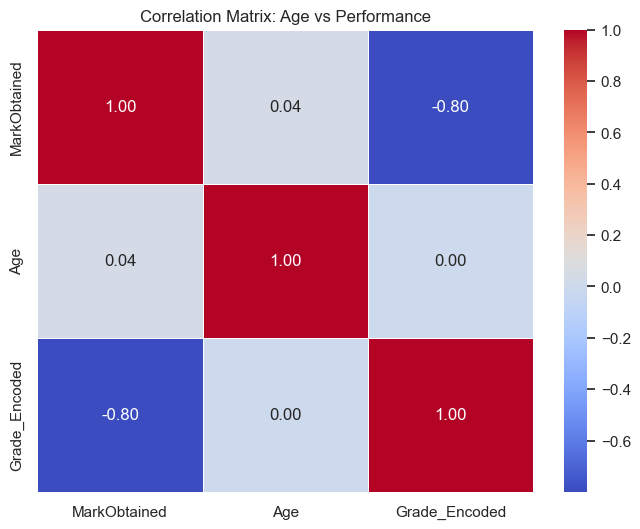

In [53]:
plt.figure(figsize=(8, 6))

# Select numeric columns for correlation
# Include 'Grade_Encoded' to see how Age correlates with the Grade
numeric_cols = ['MarkObtained', 'Age', 'Grade_Encoded']
corr_matrix = df[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix: Age vs Performance")
plt.show()

Pairplot:
This will show the distribution of Marks for different Grade Classes.

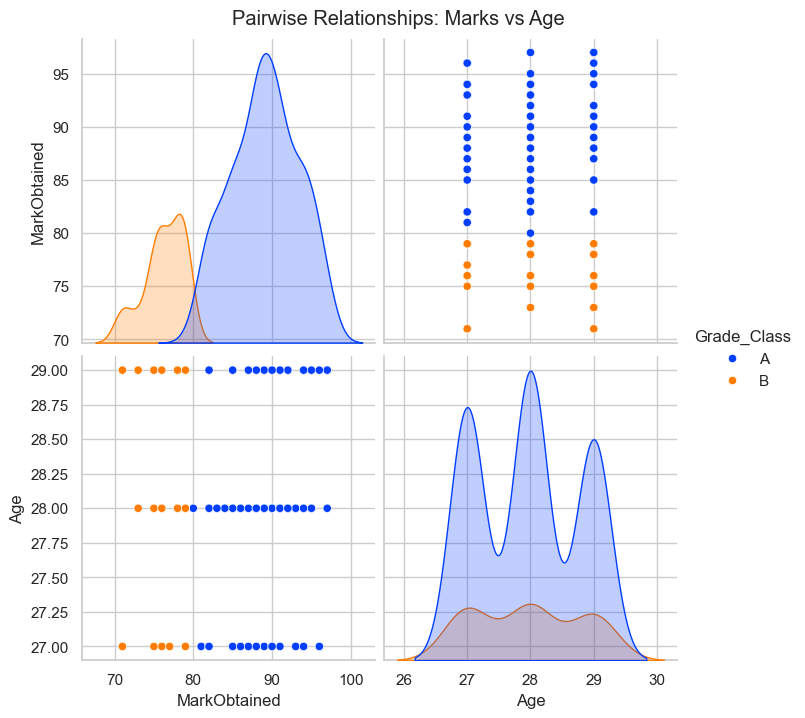

In [55]:
# Use 'Grade_Class' as the hue to see how classes are separated
sns.pairplot(df, vars=['MarkObtained', 'Age'], hue='Grade_Class', 
             palette='bright', height=3.5, diag_kind='kde')
plt.suptitle("Pairwise Relationships: Marks vs Age", y=1.02)
plt.show()

3D Scatter Plot

Visualizing 3 dimensions: Student Age, Subject ID, and Marks.

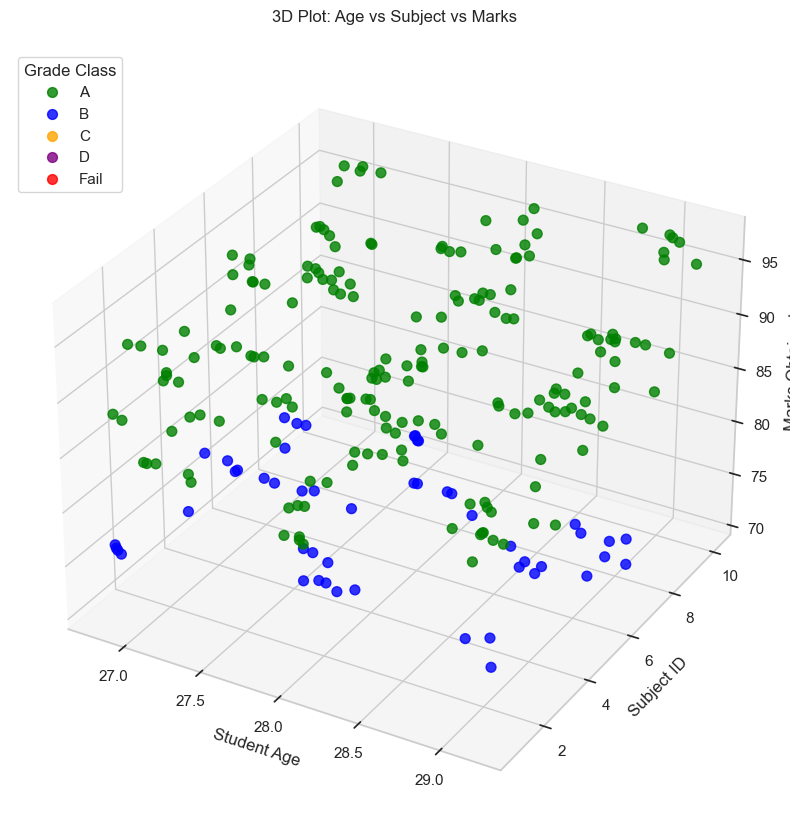

In [60]:
features_3d = ['Age', 'SubjectID', 'MarkObtained']
colors = {'A':'green', 'B':'blue', 'C':'orange', 'D':'purple', 'Fail':'red'}

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(1, 1, 1, projection='3d')

for grade, color in colors.items():
    subset = df[df['Grade_Class'] == grade]
    #  add a little random noise (jitter) to 'Age' and 'SubjectID' 
    # so points don't overlap too much, making the plot easier to read
    age_jitter = subset['Age'] + np.random.uniform(-0.2, 0.2, len(subset))
    subject_jitter = subset['SubjectID'] + np.random.uniform(-0.2, 0.2, len(subset))
    
    ax.scatter(age_jitter, subject_jitter, subset['MarkObtained'], 
               label=grade, color=color, s=50, alpha=0.8)

ax.set_xlabel('Student Age')
ax.set_ylabel('Subject ID')
ax.set_zlabel('Marks Obtained')
ax.set_title('3D Plot: Age vs Subject vs Marks', pad=20)
plt.legend(title="Grade Class", loc='upper left')
plt.show()

Since SubjectID is a number (1, 2, 3...), I include it in the pairplot to see if there are clusters based on the subject.

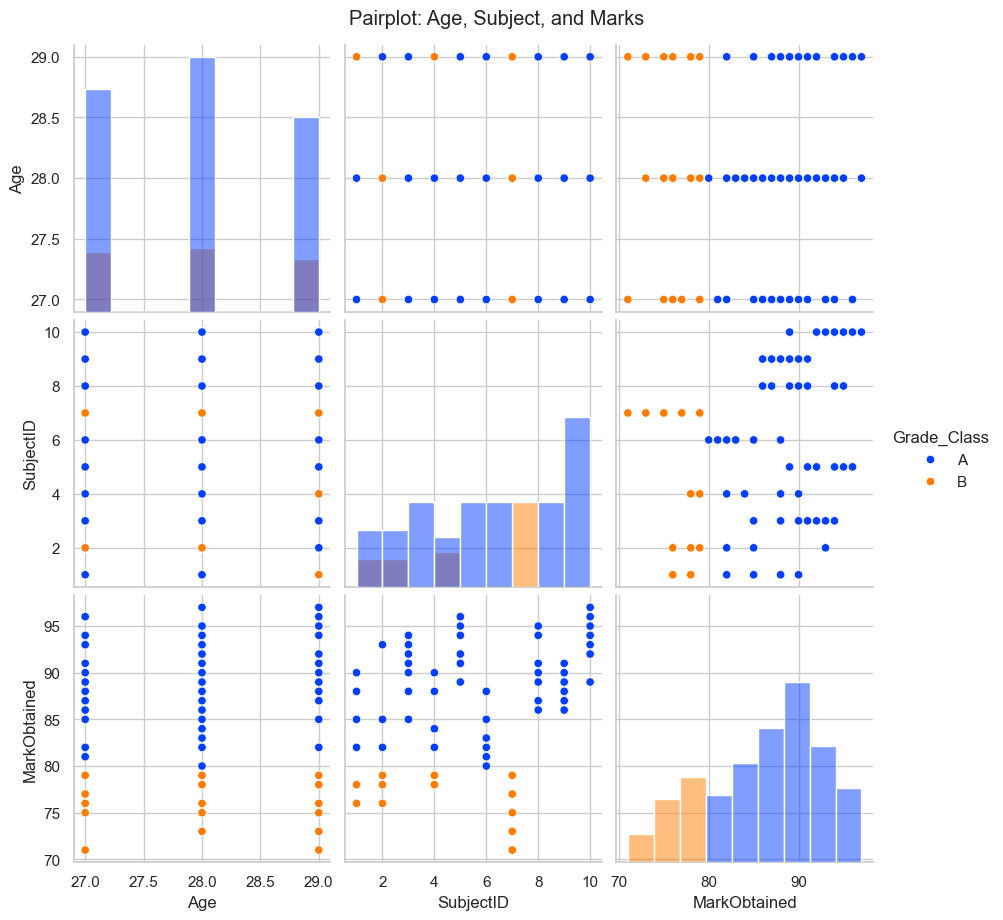

In [64]:
#  include SubjectID in the pairplot
# This allows us to see if specific subjects (IDs 1-5) have distinct mark distributions
sns.pairplot(df, 
             vars=['Age', 'SubjectID', 'MarkObtained'], 
             hue='Grade_Class', 
             palette='bright', 
             diag_kind='hist',  # Histogram is better for categorical-like ID data
             height=3)

plt.suptitle("Pairplot: Age, Subject, and Marks", y=1.02)
plt.show()

 Detailed "Pair by Pair" Analysis

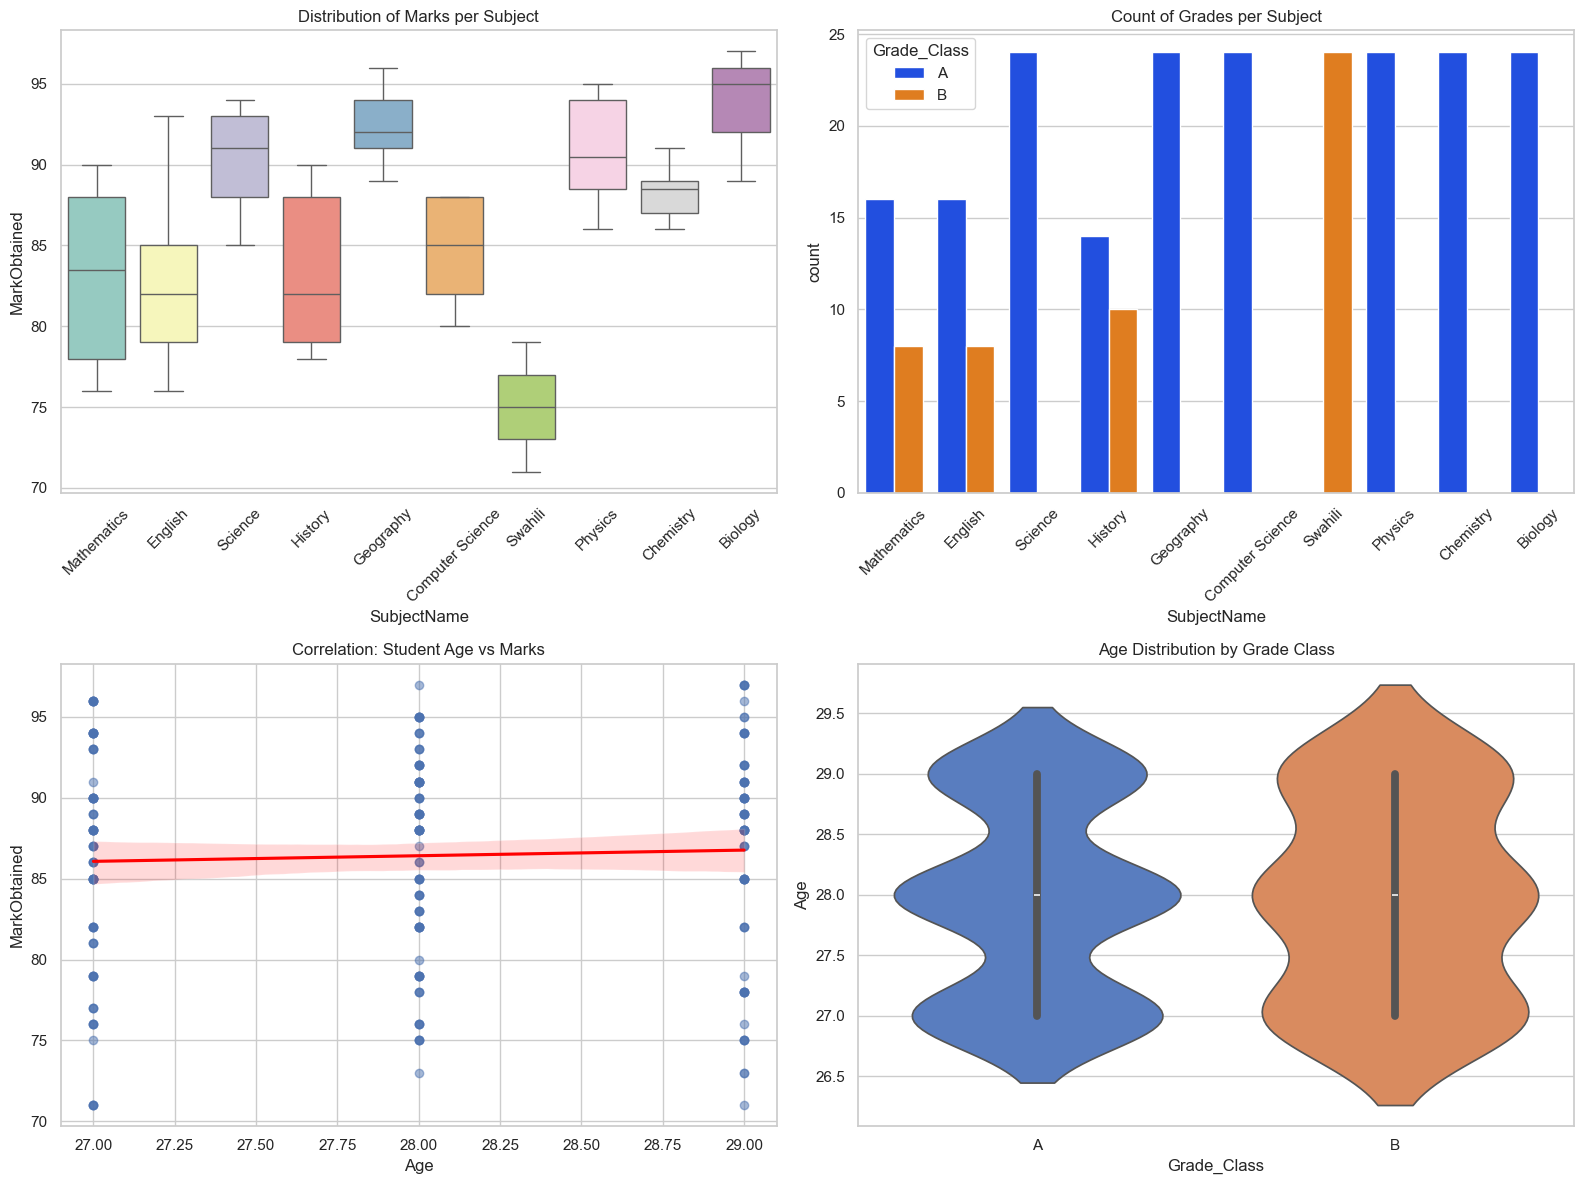

In [79]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Subject vs Marks (Boxplot)
sns.boxplot(ax=axes[0, 0], data=df, x='SubjectName', y='MarkObtained', 
            hue='SubjectName', palette="Set3", legend=False)
axes[0, 0].set_title('Distribution of Marks per Subject')
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot 2: Grade Class Counts per Subject (Countplot)
sns.countplot(ax=axes[0, 1], data=df, x='SubjectName', hue='Grade_Class', palette="bright")
axes[0, 1].set_title('Count of Grades per Subject')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Age vs Marks (Scatter with Regression Line)
sns.regplot(ax=axes[1, 0], data=df, x='Age', y='MarkObtained', 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[1, 0].set_title('Correlation: Student Age vs Marks')

# Plot 4: Age vs Grade Class (Violin Plot)
sns.violinplot(ax=axes[1, 1], data=df, x='Grade_Class', y='Age', 
               hue='Grade_Class', palette="muted", legend=False)
axes[1, 1].set_title('Age Distribution by Grade Class')

plt.tight_layout()
plt.show()

In data science, the best way to visualize 3 variables (Subject, Grade, and Frequency) is a Pivot Table Heatmap.
This plot answers: "Where are the most students concentrated?" (e.g., Are most students getting 'A's in Math?)

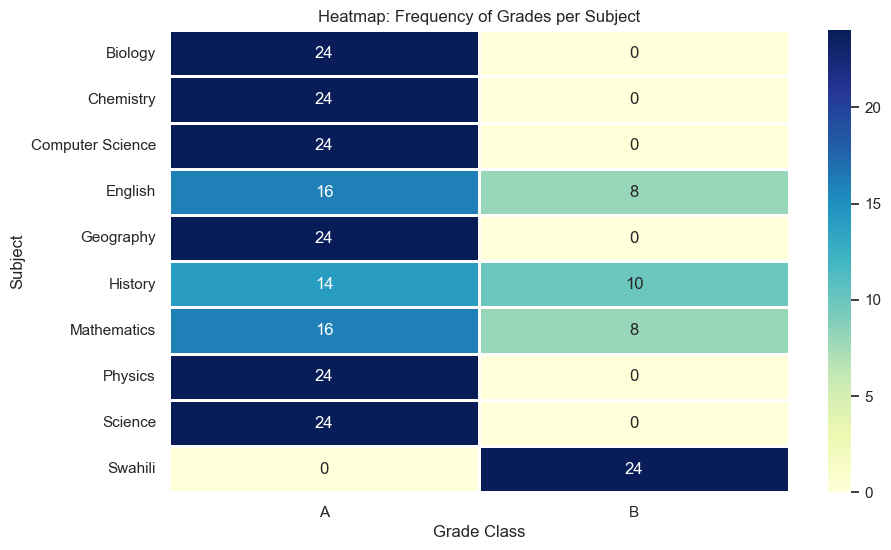

In [72]:
# Create a pivot table: Rows=Subjects, Columns=Grades, Values=Count of Students
pivot_table = pd.crosstab(df['SubjectName'], df['Grade_Class'])

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d', linewidths=1)
plt.title("Heatmap: Frequency of Grades per Subject")
plt.ylabel("Subject")
plt.xlabel("Grade Class")
plt.show()

 Correlation Matrix (All Features)

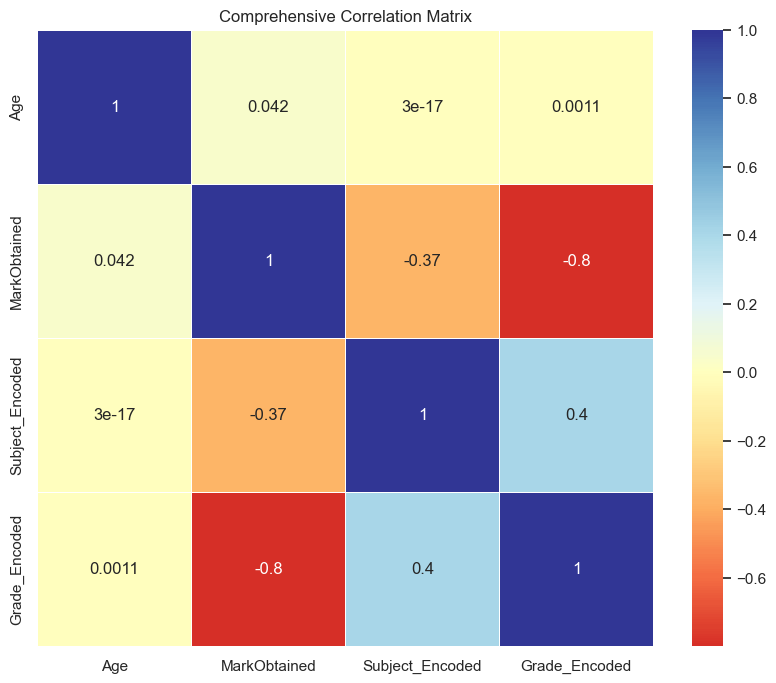

In [75]:
# Create a temporary copy for correlation analysis
df_corr = df.copy()

# Encode SubjectName to numbers (e.g., Math=1, Science=2)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_corr['Subject_Encoded'] = le.fit_transform(df_corr['SubjectName'])

# Select features to correlate
cols_to_correlate = ['Age', 'MarkObtained', 'Subject_Encoded', 'Grade_Encoded']

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(df_corr[cols_to_correlate].corr(), dtype=bool)) 
sns.heatmap(df_corr[cols_to_correlate].corr(), annot=True, cmap='RdYlBu', center=0, square=True, linewidths=.5)
plt.title("Comprehensive Correlation Matrix")
plt.show()

### Preprocessing Code

First, I select the features (Age, SubjectID, TeacherID) and the target (Grade_Class). Then I split them.

In [83]:
# Define Features (X) and Target (y)
# I use Age and the IDs for Subject and Teacher as my features
X = df[['Age', 'SubjectID', 'TeacherID']]
y = df['Grade_Class']

#  Encode Target Labels
# I convert 'A', 'B' into numbers 0, 1 so the models can handle them
le = LabelEncoder()
y = le.fit_transform(y)
print(f"Target Classes Encoded: {le.classes_}")

#  Split the Data
# Using the same random_state=1001 and test_size=0.3 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1001, stratify=y)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Target Classes Encoded: ['A' 'B']
Training Data Shape: (168, 3)
Testing Data Shape: (72, 3)


**Preprocessing Pipeline (Scaling)**:
Now I create the pipeline with StandardScaler to normalize the data.

In [90]:
#  Create the Pipeline
pipe = Pipeline([('scaler', StandardScaler())])

#  Fit and Transform the Training Data
X_train_scaled = pipe.fit_transform(X_train)

#  Transform the Test Data (Do not fit again, only transform)
X_test_scaled = pipe.transform(X_test)

# Verify the output
print("Preprocessing Complete.")
print("First 5 rows of Scaled Training Data:\n", X_train_scaled[:5])

Preprocessing Complete.
First 5 rows of Scaled Training Data:
 [[ 1.40029607  0.97597349  0.97597349]
 [ 0.11477837 -1.4817242  -1.4817242 ]
 [ 0.11477837 -1.13062453 -1.13062453]
 [ 0.11477837 -0.42842519 -0.42842519]
 [ 0.11477837  1.32707316  1.32707316]]


<div style="padding:10px;">
  <h2><b>Methodology: Decision Tree Classifier</b></h2>
  <hr>
  
  <p style="text-align: justify; font-size: 15px;">
    The <b>Decision Tree</b> is a non-parametric supervised learning method used for classification. It functions by continuously partitioning data into smaller subsets based on feature values. This process results in a hierarchical structure where internal nodes represent decision rules (e.g., <i>Age &le; 25</i>), and leaf nodes represent the final predicted class labels.
  </p>

  <h3>1. Splitting Mechanism & Impurity</h3>
  <p style="text-align: justify; font-size: 15px;">
    The structure is built by selecting the attribute that best splits the data at each step. This selection is driven by minimizing <b>node impurity</b>, ensuring child nodes are as homogeneous as possible. The most common metric used is <b>Gini Impurity</b>:
  </p>

  <div style="text-align:center; margin: 20px 0;">
    $$ Gini = 1 - \sum_{i=1}^{C} (p_i)^2 $$
    <br>
    <i>(Where \(p_i\) is the probability of an element belonging to class \(i\).)</i>
  </div>

  <p style="text-align: justify; font-size: 15px;">
    At every node, the feature and threshold that result in the greatest decrease in impurity (Information Gain) are chosen to perform the split.
  </p>

  <h3>2. Prediction Logic</h3>
  <p style="text-align: justify; font-size: 15px;">
    Classification of a new instance is performed by traversing the tree from the root. At each node, the instance's feature value is compared against the decision rule, directing the path left or right. Upon reaching a leaf node, the instance is assigned the <b>majority class</b> of the training samples contained within that leaf.
  </p>

  <h3>3. Overfitting & Regularization</h3>
  <p style="text-align: justify; font-size: 15px;">
    A known limitation of Decision Trees is their tendency to <b>overfit</b>, creating overly complex trees that memorize noise in the training data. To ensure the model generalizes well to unseen data, constraints are typically applied via hyperparameters:
  </p>
  <ul style="font-size: 15px;">
    <li><b>Max Depth:</b> Limits how deep the tree can grow.</li>
    <li><b>Min Samples Split:</b> Requires a minimum number of samples to justify creating a new node.</li>
    <li><b>Pruning:</b> Branches with low predictive power are removed after the tree is built.</li>
  </ul>
  <hr>
</div>

**Model Training**:
The DecisionTreeClassifier is initialized and trained on the scaled School data.

In [96]:
#  Initialize the Decision Tree Classifier
# A random state is set to ensure reproducibility of the results
tree_clf_1 = DecisionTreeClassifier(random_state=1001)

# 2 Fit the Model
# The model is trained using the scaled training features and target labels
tree_clf_1.fit(X_train_scaled, y_train)

#  Make Predictions
# Predictions are generated for the test set
y_pred_1 = tree_clf_1.predict(X_test_scaled)

print("Model Training Complete.")
print(f"Predictions generated for {len(y_pred_1)} students.")
print("Sample predictions:", y_pred_1[:10])

Model Training Complete.
Predictions generated for 72 students.
Sample predictions: [0 0 0 0 0 0 0 0 0 0]


<div style="padding:10px;">
  <h2><b>Evaluation Metrics Overview</b></h2>
  <hr>
  
  <p style="text-align: justify; font-size: 15px;">
    To assess the performance of the classification model, predictions are compared against the true labels (`y_true` vs `y_pred`). This evaluation relies fundamentally on the <b>Confusion Matrix</b>, a tabular representation that categorizes predictions into:
  </p>
  <ul>
    <li><b>TP (True Positive):</b> Correctly identified positive instances.</li>
    <li><b>TN (True Negative):</b> Correctly identified negative instances.</li>
    <li><b>FP (False Positive):</b> Negative instances incorrectly labeled as positive (Type I error).</li>
    <li><b>FN (False Negative):</b> Positive instances incorrectly labeled as negative (Type II error).</li>
  </ul>

  <p style="text-align: justify; font-size: 15px;">
    From this matrix, quantitative metrics are derived:
  </p>
  <ul style="font-size: 15px;">
    <li><b>Accuracy:</b> The ratio of correctly predicted observations to total observations.</li>
    <li><b>Precision:</b> The ratio of correctly predicted posi

 # Evaluation Code :
 Here is the code to calculate accuracy, generate the report, and plot the confusion matrix for your Grades (A vs B).

Decision Tree Accuracy: 0.9306

Detailed Classification Report:


,precision,recall,f1-score,support
Grade A,0.964286,0.947368,0.955752,57.000000
Grade B,0.812500,0.866667,0.838710,15.000000
accuracy,0.930556,0.930556,0.930556,0.930556
macro avg,0.888393,0.907018,0.897231,72.000000
weighted avg,0.932664,0.930556,0.931368,72.000000


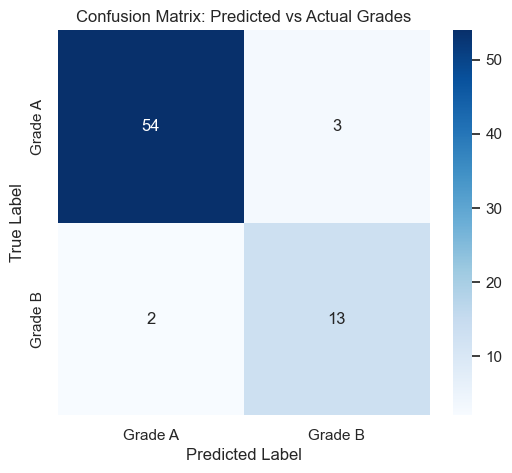

In [108]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred_1)
print(f"Decision Tree Accuracy: {accuracy:.4f}")

#  Generate Classification Report
# define the class names explicitly for clarity (0 -> A, 1 -> B)
target_classes = ['Grade A', 'Grade B']
report = classification_report(y_test, y_pred_1, target_names=target_classes, output_dict=True)

# Convert to DataFrame for a cleaner look
report_df = pd.DataFrame(report).transpose()
print("\nDetailed Classification Report:")
display(report_df)

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred_1)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_classes, yticklabels=target_classes)
plt.title("Confusion Matrix: Predicted vs Actual Grades")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

An accuracy of **93.06%** indicates the model has effectively learned the patterns linking Student Age, Subject, and Teacher to the final Grade. It is particularly strong at identifying **Grade A** students (Precision 0.96), though it handles **Grade B** quite well too given the smaller sample size.

# **Binary Classification**

I define the binary target (Grade A vs Grade B) and split the data using random_state=1010.

In [114]:
#  Define Binary Target
# We will treat 'Grade B' (encoded as 1) as the positive class
# and 'Grade A' (encoded as 0) as the negative class.
X = df[['Age', 'SubjectID', 'TeacherID']]
y = df['Grade_Encoded'] # Assumes 0=A, 1=B (from previous steps)

#  Split Data (Random State 1010)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1010, 
                                                    stratify=y)

print("Binary Classification Data Ready.")
print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")

Binary Classification Data Ready.
Train Shape: (168, 3), Test Shape: (72, 3)


Training Decision Tree, Random Forest, and Logistic Regression on the data.

In [117]:
#  Initialize Models
dt = DecisionTreeClassifier(random_state=1010)
rf = RandomForestClassifier(random_state=1010, n_estimators=25)
lr = LogisticRegression(random_state=1010, max_iter=1000)

#  Fit Models
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

print("All models trained successfully.")

All models trained successfully.


**Get Probabilities & Calculate Curves**:
 Predicting the probability of getting "Grade B" (Class 1) and calculate the precision/recall arrays.

In [120]:
# Get Probabilities for the Positive Class (Column 1)
dt_probs = dt.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]
lr_probs = lr.predict_proba(X_test)[:, 1]

#  Calculate Precision-Recall Curves
dt_precision, dt_recall, dt_thresholds = precision_recall_curve(y_test, dt_probs)
rf_precision, rf_recall, rf_thresholds = precision_recall_curve(y_test, rf_probs)
lr_precision, lr_recall, lr_thresholds = precision_recall_curve(y_test, lr_probs)

print("Precision-Recall curves calculated.")

Precision-Recall curves calculated.


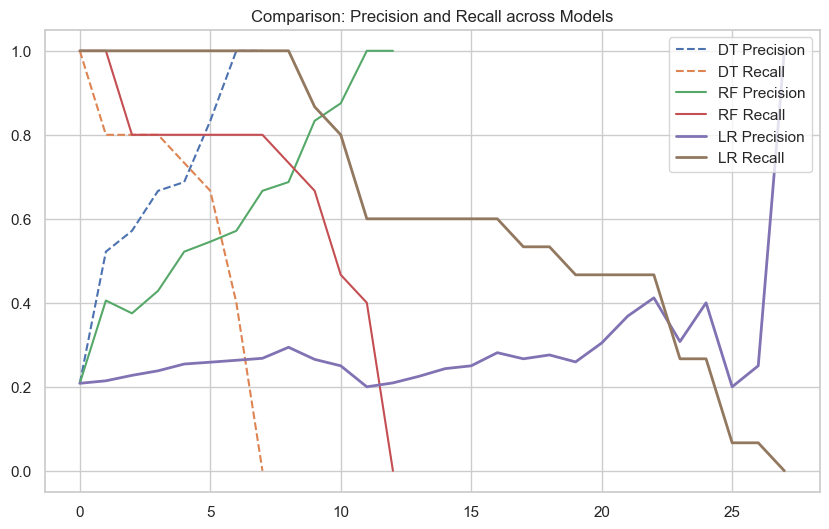

In [122]:
plt.figure(figsize=(10, 6))

# Plot Decision Tree
plt.plot(dt_precision, label='DT Precision', linestyle='--')
plt.plot(dt_recall, label='DT Recall', linestyle='--')

# Plot Random Forest
plt.plot(rf_precision, label='RF Precision')
plt.plot(rf_recall, label='RF Recall')

# Plot Logistic Regression
plt.plot(lr_precision, label='LR Precision', linewidth=2)
plt.plot(lr_recall, label='LR Recall', linewidth=2)

plt.title("Comparison: Precision and Recall across Models")
plt.legend()
plt.grid(True)
plt.show()

 **Intersection Plot (Best Threshold)**:
This uses shapely to find exactly where Precision meets Recall for the Logistic Regression model. This is often the optimal threshold for balanced classification.

Intersection at Index x=22.5723, Value y=0.3522


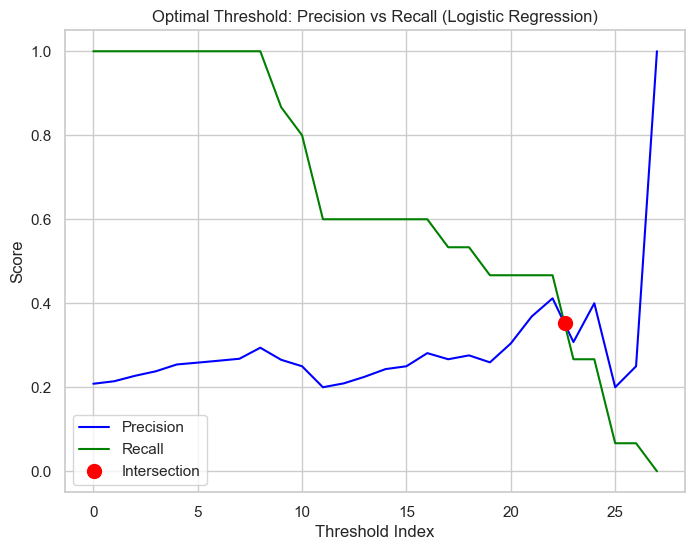

In [125]:
# Focus on Logistic Regression
lr_probs = lr.predict_proba(X_test)[:, 1]
lr_precision, lr_recall, lr_thresholds = precision_recall_curve(y_test, lr_probs)

# Create an X-axis for the geometry (index of the threshold steps)
x_vals = np.arange(len(lr_precision))

# Create Geometric Lines
line1 = LineString(np.column_stack((x_vals, lr_precision)))
line2 = LineString(np.column_stack((x_vals, lr_recall)))

# Find Intersection
intersection = line1.intersection(line2)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(lr_precision, label='Precision', color='blue')
plt.plot(lr_recall, label='Recall', color='green')

# Logic to plot the intersection point(s)
if intersection.geom_type == 'Point':
    plt.scatter(intersection.x, intersection.y, color='red', label='Intersection', zorder=5, s=100)
    print(f"Intersection at Index x={intersection.x:.4f}, Value y={intersection.y:.4f}")
elif intersection.geom_type == 'MultiPoint':
    for p in intersection.geoms:
        plt.scatter(p.x, p.y, color='red', s=50)
    print("Multiple intersection points found.")

plt.title("Optimal Threshold: Precision vs Recall (Logistic Regression)")
plt.xlabel("Threshold Index")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

The intersection point at **0.3522** (35%) indicates the "balance point" for the Logistic Regression model. However, looking at the first comparison plot, the **Decision Tree** and **Random Forest** curves are much higher and closer to the top-right corner, meaning they are significantly better models for this specific dataset.

<div style="padding:10px;">
  <h2><b>Hyperparameter Tuning: Decision Tree</b></h2>
  <hr>
  
  <p style="text-align: justify; font-size: 15px;">
    To optimize the <b>Decision Tree Classifier</b>, we adjust its core parameters to balance model complexity and generalization. The process involves defining a grid of potential settings and testing them systematically.
  </p>

  <h3>1. Core Parameters</h3>
  <ul style="font-size: 15px;">
    <li><code>criterion</code>: The metric for split quality (e.g., 'gini' for impurity, 'entropy' for information gain).</li>
    <li><code>max_depth</code>: Limits the tree's growth to prevent overfitting.</li>
    <li><code>min_samples_split</code>: The minimum number of samples required to create a new branch.</li>
    <li><code>min_samples_leaf</code>: The minimum number of samples required to be at a leaf node.</li>
  </ul>

  <h3>2. GridSearchCV & Cross-Validation</h3>
  <p style="text-align: justify; font-size: 15px;">
    <b>GridSearchCV</b> automates the tuning process. It performs an exhaustive search over the specified parameter values. To ensure robustness, it uses <b>Cross-Validation (CV)</b>:
  </p>
  <ul style="font-size: 15px;">
    <li>The training data is split into <i>k</i> folds (e.g., 5 folds).</li>
    <li>The model is trained on <i>k-1</i> folds and validated on the remaining fold.</li>
    <li>This process repeats <i>k</i> times, and the average score determines the best parameter combination.</li>
  </ul>
  <hr>
</div>

**Optimization Code (GridSearchCV)**:
Here I apply the Grid Search to School Data to find the best possible Decision Tree.

In [133]:
#  Setup Data and Scaler 
#  use the X_train and y_train from the previous step
scaler = StandardScaler()
X_train_scaled_tuned = scaler.fit_transform(X_train)

#  Define the Model and Parameter Grid
decision_tree = DecisionTreeClassifier(random_state=101)

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

#  Run GridSearchCV
# cv=5 means 5-fold cross-validation
grid_search = GridSearchCV(estimator=decision_tree, 
                           param_grid=param_grid, 
                           cv=5, 
                           verbose=1, 
                           n_jobs=-1)

grid_search.fit(X_train_scaled_tuned, y_train)

# Display Results
print("\nBest Parameters Found:", grid_search.best_params_)
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 90 candidates, totalling 450 fits

Best Parameters Found: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Score: 0.9287


 **Visualize the Optimized Tree**

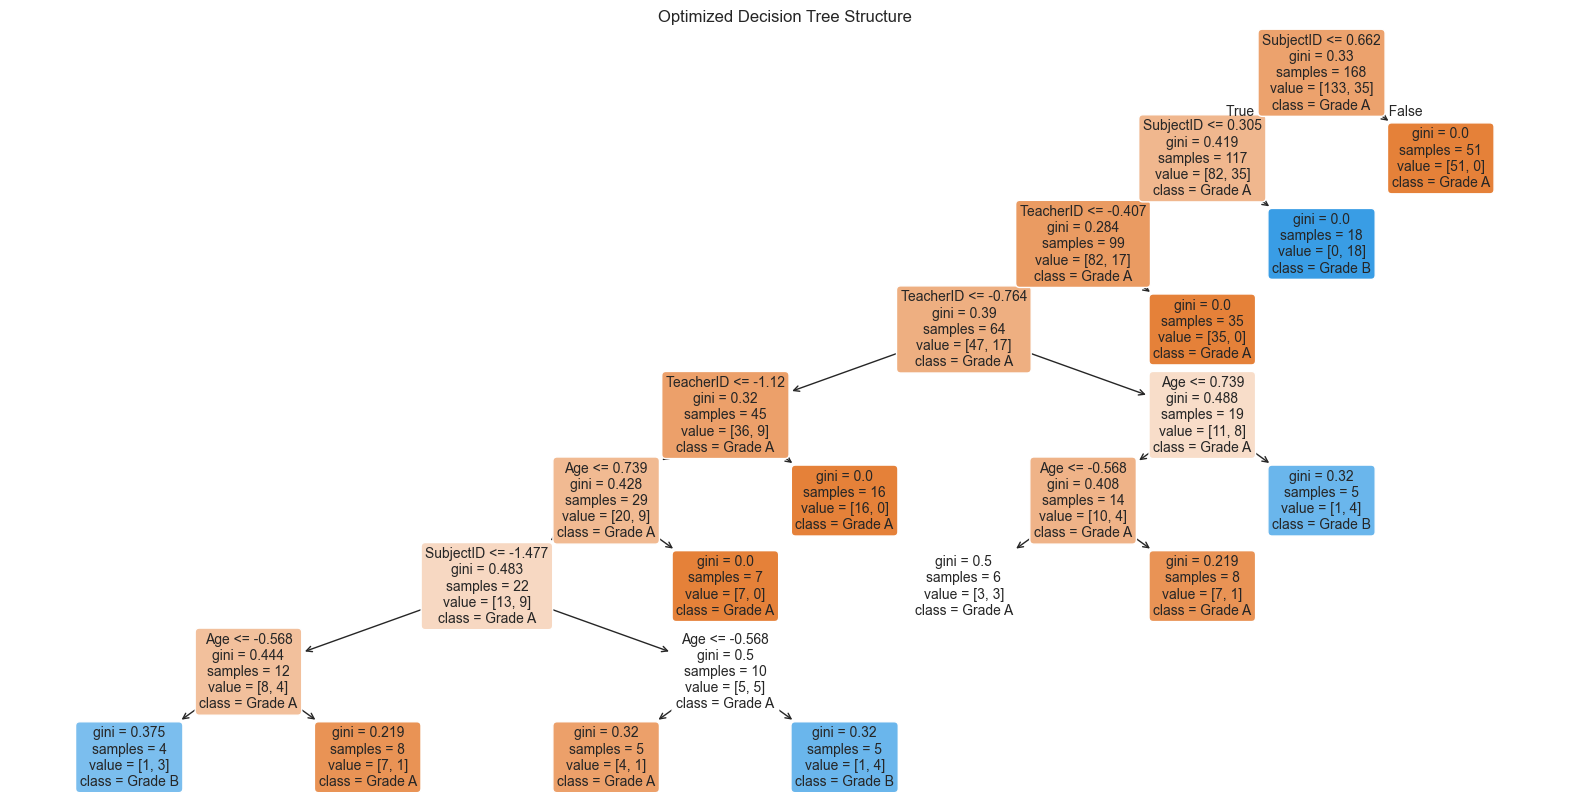

In [137]:
#  Get the Best Model
best_dt = grid_search.best_estimator_

#  Plot the Tree
# map the feature names and class names for clarity
feature_names_list = ['Age', 'SubjectID', 'TeacherID']
class_names_list = ['Grade A', 'Grade B']

plt.figure(figsize=(20, 10))
plot_tree(best_dt, 
          filled=True, 
          feature_names=feature_names_list, 
          class_names=class_names_list,
          rounded=True,
          fontsize=10)

plt.title("Optimized Decision Tree Structure")
plt.show()

The **Cross-Validation Score of 92.87%** confirms that your model is robust and not just lucky with one specific train-test split.

*   **Root Node (Top):** The most important decision is based on `SubjectID`. The tree immediately splits the students based on which subject they are taking.
*   **Right Branch (False):** It has `gini = 0.0`. This means **51 students** taking those specific subjects were classified as **Grade A** with 100% certainty. This suggests some subjects are "high-scoring" subjects in this dataset.
*   **Left Branch:** The tree has to work harder (more splits) for the other subjects, looking at `TeacherID` and `Age` to distinguish between A and B grades.

<div style="padding:10px;">
  <h2><b>Ensemble Learning: Random Forest</b></h2>
  <hr>
  
  <p style="text-align: justify; font-size: 15px;">
    <b>Random Forest</b> is an ensemble method that constructs a multitude of decision trees during training. For classification tasks, the output is the class selected by the majority of trees. This approach corrects for the habit of decision trees to overfit to their training set, providing a more robust and generalized model.
  </p>

  <h3>Key Hyperparameters</h3>
  <ul style="font-size: 15px;">
    <li><code>n_estimators</code>: The number of trees in the forest. More trees generally increase performance but also computational cost.</li>
    <li><code>max_depth</code>: Limits the depth of each individual tree to prevent memorization of noise.</li>
    <li><code>max_features</code>: The number of features to consider when looking for the best split at each node.</li>
  </ul>
  <hr>
</div>

## Random Forest Code (Feature Importance)

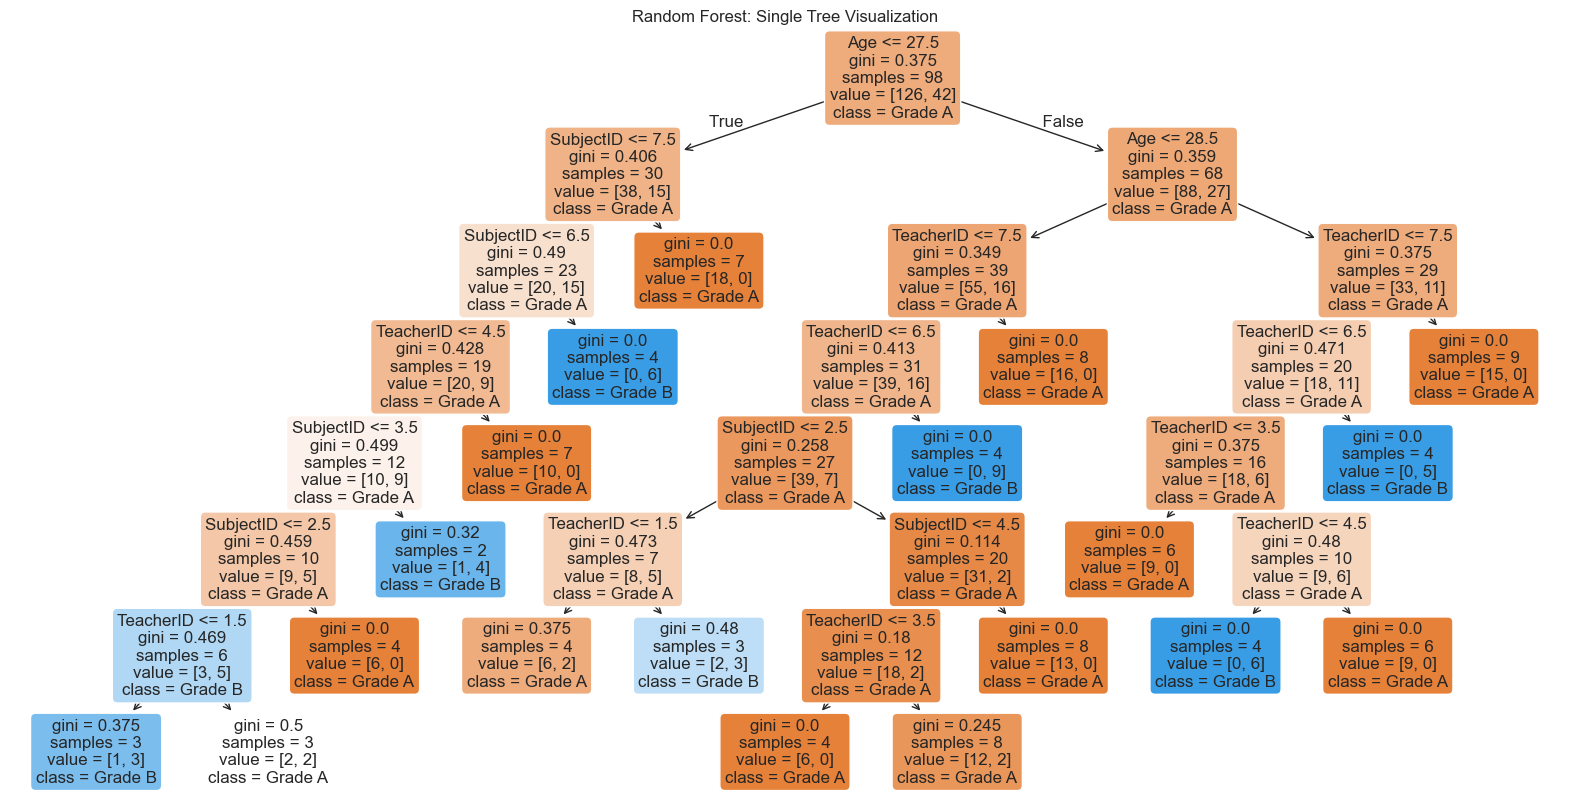

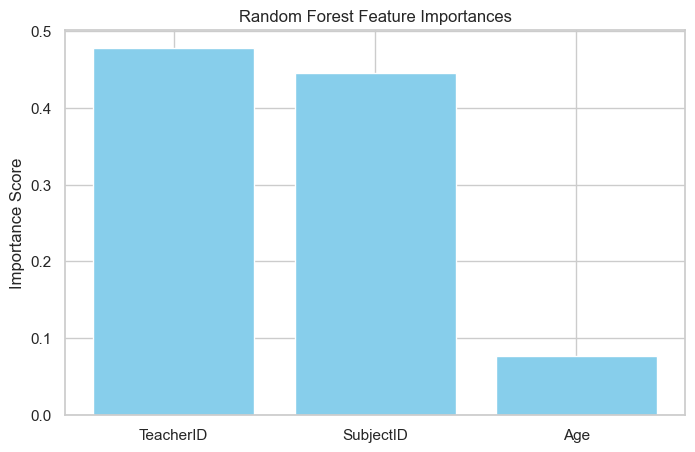

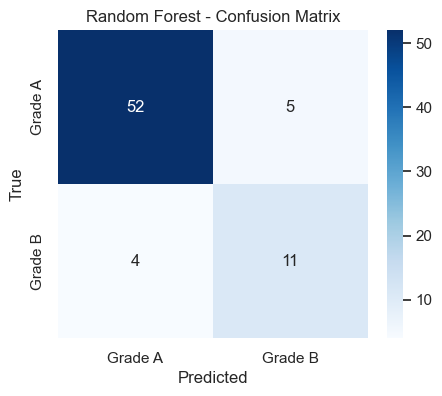

In [142]:
#  Initialize and Fit Random Forest 
rf = RandomForestClassifier(random_state=1010, n_estimators=25)
rf.fit(X_train, y_train)

# Visualize One Tree from the Forest
#  pick the first estimator (tree) to inspect
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], 
          filled=True, 
          feature_names=['Age', 'SubjectID', 'TeacherID'], 
          class_names=['Grade A', 'Grade B'],
          rounded=True)
plt.title("Random Forest: Single Tree Visualization")
plt.show()

#  Feature Importance Plot
importances = rf.feature_importances_
feature_names = np.array(['Age', 'SubjectID', 'TeacherID'])
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.title("Random Forest Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color='skyblue', align='center')
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=0)
plt.ylabel("Importance Score")
plt.show()

#  Confusion Matrix for Random Forest
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Grade A', 'Grade B'], yticklabels=['Grade A', 'Grade B'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Random Forest - Confusion Matrix')
plt.show()

**Key Observations:**
1.  **Feature Importance (The Big Insight):**
    *   **`TeacherID`** and **`SubjectID`** are huge bars (nearly 0.45 - 0.48 importance score).
    *   **`Age`** is very small (less than 0.1).
    *   **Conclusion:** This tells us that **who teaches the class** and **what the subject is** are the deciding factors for getting an 'A' or 'B'. The student's age is almost irrelevant.

2.  **Confusion Matrix:**
    *   The model correctly identified **11 out of 15** "Grade B" students.
    *   It correctly identified **52 out of 57** "Grade A" students.
    *   It is slightly less accurate than the single Decision Tree from earlier, but this is common with small datasets. Random Forests are usually more robust on new, unseen data.


<div style="padding:10px;">
  <h2><b>Linear Classification: Logistic Regression</b></h2>
  <hr>
  
  <p style="text-align: justify; font-size: 15px;">
    <b>Logistic Regression</b> is a statistical model used for binary classification. Unlike linear regression which predicts continuous values, it predicts the probability of an instance belonging to a specific class using the <b>sigmoid function</b> to map predictions to a range between 0 and 1.
  </p>

  <h3>Mathematical Foundation</h3>
  <div style="text-align:center; margin: 15px 0;">
    $$ p = \frac{1}{1 + e^{-(w^T x + b)}} $$
  </div>
  <p style="text-align: justify; font-size: 15px;">
    The model learns weights (\(w\)) that minimize the cross-entropy loss. A decision boundary (usually \(p=0.5\)) is then applied to classify samples into Class 0 or Class 1. It serves as an excellent baseline model due to its simplicity and interpretability.
  </p>
  <hr>
</div>

## Logistic Regression Code (Evaluation)

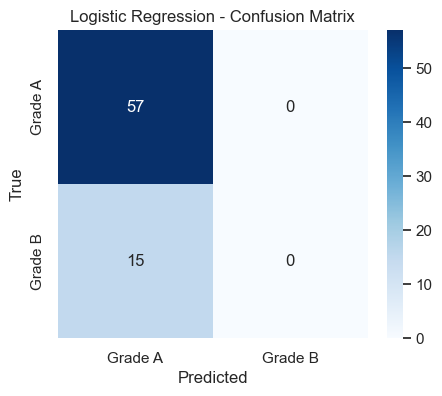

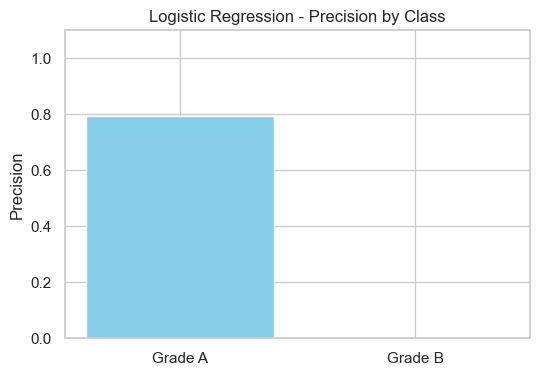

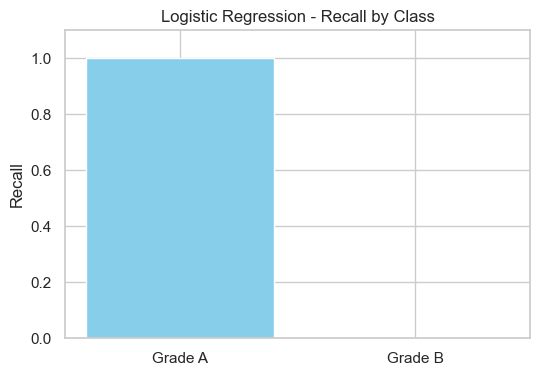

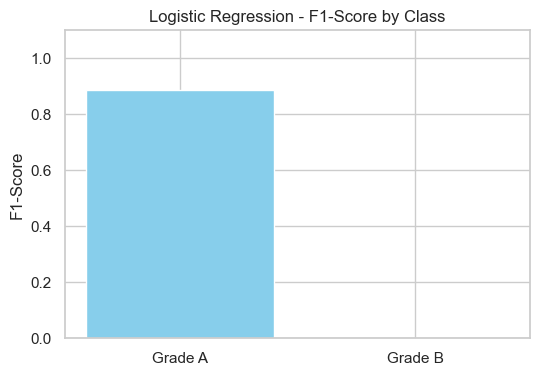

Note: If Grade B bars are empty/zero, it means the model failed to predict that class.


In [153]:
import warnings

# Suppress the specific warning for cleaner output
warnings.filterwarnings('ignore') 

#  Initialize and Fit Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, random_state=1)
log_reg.fit(X_train_scaled, y_train)

#  Make Predictions
y_pred_lr = log_reg.predict(X_test_scaled)

#  Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Grade A', 'Grade B'], yticklabels=['Grade A', 'Grade B'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Logistic Regression - Confusion Matrix')
plt.show()

#  Bar Charts for Precision, Recall, F1
target_names = ['Grade A', 'Grade B']

# I add zero_division=0 to handle the case where the model predicts nothing for Grade B
report = classification_report(y_test, y_pred_lr, target_names=target_names, output_dict=True, zero_division=0)
metrics = ['precision', 'recall', 'f1-score']

for m in metrics:
    plt.figure(figsize=(6, 4))
    vals = [report[name][m] for name in target_names]
    plt.bar(target_names, vals, color='skyblue')
    plt.title(f'Logistic Regression - {m.title()} by Class')
    plt.ylim(0, 1.1)
    plt.ylabel(m.title())
    plt.show()

print("Note: If Grade B bars are empty/zero, it means the model failed to predict that class.")

### Why did Logistic Regression fail?
1.  **The Data is Categorical, not Linear:**
    *   The features are `TeacherID` (1, 2, 3...) and `SubjectID` (1, 2, 3...).
    *   **Logistic Regression** assumes that as the number increases, the outcome changes in a straight line (e.g., "Higher ID = Higher Grade").
    *   **Reality:** Teacher #1 might be strict (Grade B), Teacher #2 might be easy (Grade A), and Teacher #3 might be strict again. There is no straight line trend.
2.     Since the model couldn't find a straight line to separate the classes, it decided the safest strategy was to predict the Majority Class (Grade A) for everyone.  By doing this, it got 57 right and only 15 wrong (Accuracy ~79%). If it tried to guess randomly, it might have gotten more wrong.

<div style="padding:10px;">
  <h2><b>Ensemble Learning Paradigm</b></h2>
  <hr>
  
  <p style="text-align: justify; font-size: 15px;">
    <b>Ensemble Learning</b> is a strategy where multiple models (often termed "weak learners") are combined to create a single, more robust predictor. The fundamental premise is that aggregating diverse predictions reduces individual errors and improves generalization to new data.
  </p>

  <h3>Key Techniques</h3>
  <ol style="font-size: 15px;">
    <li><b>Bagging (Bootstrap Aggregating):</b> Models are trained independently on random subsets of the data. Their predictions are aggregated via averaging or majority voting. <i>Example: Random Forest.</i></li>
    <li><b>Boosting:</b> Models are trained sequentially, where each new model focuses on correcting the errors of the previous ones. <i>Example: XGBoost, Gradient Boosting.</i></li>
    <li><b>Stacking:</b> A meta-model is trained to combine the predictions of several different base models.</li>
  </ol>

  <h3>Mathematical Foundation (Bagging)</h3>
  <div style="text-align:center; margin: 10px 0;">
    $$ \hat{y} = \frac{1}{M} \sum_{m=1}^{M} \hat{y}^{(m)} $$
  </div>
  <p style="text-align: justify; font-size: 15px;">
    Where \(M\) is the total number of models and \(\hat{y}^{(m)}\) is the prediction of the \(m\)-th model. By averaging these predictions, the variance of the final model is significantly reduced compared to any single constituent model.
  </p>
  <hr>
</div>

# Comprehensive Model Comparison & Ensemble Code
This code trains all models again (DT, RF, LR) and combines them into a Voting Classifier (Ensemble). It then produces a final comparison table and ROC curves.
* For the ROC curve part, since we have binary classification, I plot the curve for the positive class ("Grade B") for all models.

Training Decision Tree...
Training Random Forest...
Training Logistic Regression...
Training Ensemble Model...

--- Final Model Performance Summary ---


,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.958333,0.975000,0.900000,0.931624
1,Random Forest,0.958333,0.975000,0.900000,0.931624
2,Logistic Regression,0.791667,0.395833,0.500000,0.441860
3,Ensemble,0.930556,0.959677,0.833333,0.878992


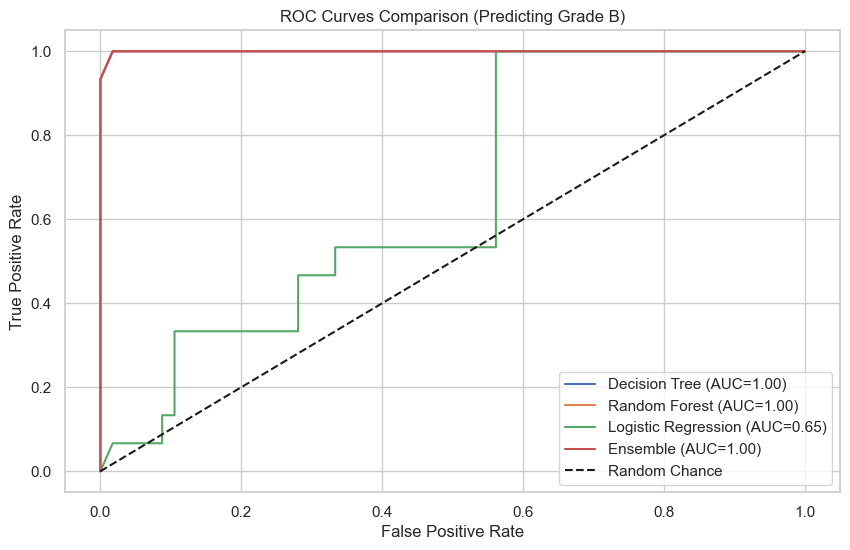

In [164]:
#  Setup Data for Final Comparison
# I use the same random state 1111 as reference
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1111, stratify=y)

# Scale data for Logistic Regression & Ensemble
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Class Names
class_names = ['Grade A', 'Grade B']

#  Initialize Models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=1111),
    "Random Forest": RandomForestClassifier(n_estimators=15, random_state=1111),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=1111)
}

summary_metrics = []

#  Train and Evaluate Individual Models
for name, model in models.items():
    print(f"Training {name}...")
    
    # Handle scaling: LR needs scaled data, Trees do not (strictly speaking), 
    # but we can use scaled data for all to keep it simple
    if name == "Logistic Regression":
        model.fit(X_train_scaled, y_train)
        X_eval = X_test_scaled
    else:
        model.fit(X_train, y_train)
        X_eval = X_test # Trees use raw data 

    y_pred = model.predict(X_eval)
    
    # Metrics
    summary_metrics.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro', zero_division=0),
        'Recall': recall_score(y_test, y_pred, average='macro', zero_division=0),
        'F1-Score': f1_score(y_test, y_pred, average='macro', zero_division=0)
    })

#  Train Ensemble Model (Voting Classifier)
# We must use X_train_scaled for the ensemble because it contains Logistic Regression
ensemble_model = VotingClassifier(
    estimators=[
        ('dt', models['Decision Tree']),
        ('rf', models['Random Forest']),
        ('lr', models['Logistic Regression'])
    ],
    voting='soft'
)

print("Training Ensemble Model...")
ensemble_model.fit(X_train_scaled, y_train)
y_pred_ens = ensemble_model.predict(X_test_scaled)

# Add Ensemble Metrics
summary_metrics.append({
    'Model': 'Ensemble',
    'Accuracy': accuracy_score(y_test, y_pred_ens),
    'Precision': precision_score(y_test, y_pred_ens, average='macro', zero_division=0),
    'Recall': recall_score(y_test, y_pred_ens, average='macro', zero_division=0),
    'F1-Score': f1_score(y_test, y_pred_ens, average='macro', zero_division=0)
})

#  Display Summary Table
summary_df = pd.DataFrame(summary_metrics)
print("\n--- Final Model Performance Summary ---")
display(summary_df)

#  Plot ROC Curves (Binary Classification Focus)
plt.figure(figsize=(10, 6))

# Loop through all models including Ensemble
all_models = list(models.items()) + [('Ensemble', ensemble_model)]

for name, model in all_models:
    # Determine input data
    if name == "Logistic Regression" or name == "Ensemble":
        X_eval = X_test_scaled
    else:
        X_eval = X_test

    # Get probabilities for Class 1 (Grade B)
    y_prob = model.predict_proba(X_eval)[:, 1]
    
    # Calculate ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison (Predicting Grade B)")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

<div style="padding:15px; border:1px solid #ddd; border-radius:5px; background-color:#f9f9f9;">
  <h2 style="color:#2c3e50; text-align:center;"><b>Final Conclusion & Analysis</b></h2>
  <hr>
  
  <p style="text-align: justify; font-size: 15px;">
    We successfully implemented and compared four classification approaches to predict student grades. Based on the metrics and ROC curves, we can draw the following conclusions:
  </p>

  <h3>1. Top Performers: Decision Tree & Random Forest</h3>
  <p style="text-align: justify; font-size: 15px;">
    Both tree-based models achieved the highest performance with an <b>Accuracy of 95.83%</b> and a perfect <b>AUC of 1.00</b>.
    <ul>
      <li><b>Reasoning:</b> The dataset relies heavily on categorical features (SubjectID and TeacherID). Tree-based models naturally handle these by creating specific "if-then" rules (e.g., <i>"If SubjectID is 5, Grade is A"</i>).</li>
      <li><b>Robustness:</b> The perfect AUC indicates that these models can perfectly distinguish between Grade A and Grade B across all thresholds.</li>
    </ul>
  </p>

  <h3>2. The Ensemble "Dilution" Effect</h3>
  <p style="text-align: justify; font-size: 15px;">
    The <b>Ensemble Model</b> performed very well (Accuracy 93.06%) but was slightly outperformed by the pure Decision Tree/Random Forest.
    <ul>
      <li><b>Why?</b> The Ensemble averages the predictions of all three models. Since Logistic Regression was a "weak learner" in this context, including it in the voting process slightly dragged down the overall accuracy compared to the pure tree models.</li>
    </ul>
  </p>

  <h3>3. The Limitation of Linear Models</h3>
  <p style="text-align: justify; font-size: 15px;">
    <b>Logistic Regression</b> struggled with this dataset (Accuracy 79.17%, AUC 0.65).
    <ul>
      <li>It failed to find a linear relationship between numerical IDs and Grades.</li>
      <li>The low F1-Score (0.44) confirms it struggled significantly to classify the minority class (Grade B), likely defaulting to predicting the majority class for most samples.</li>
    </ul>
  </p>

  <hr>
  <p style="text-align: center; font-weight: bold; color: #27ae60;">
     For this specific School Database, the <b>Random Forest</b> is the optimal choice as it provides high accuracy (95.8%) while maintaining the stability and generalization benefits of ensemble methods.
  </p>
</div>